In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#import the ER4 feature counting
ER4_pd = pd.read_csv("/Users/cmdb/qbb2021-answers/qbio_week5/ER4_feature.bed",delimiter = "\t", header = None)

In [4]:
#build a library with keys as each features and values as the count for each feature
ER4_dict = {"Intron": ER4_pd[ER4_pd[3] == "intron"].shape[0], 
            "Exon": ER4_pd[ER4_pd[3] == "exon"].shape[0],
           "Promoter": ER4_pd[ER4_pd[3] == "promoter"].shape[0]}

In [5]:
ER4_dict

{'Intron': 288, 'Exon': 116, 'Promoter': 58}

In [6]:
# import the G1E feature counting:
G1E_pd = pd.read_csv("/Users/cmdb/qbb2021-answers/qbio_week5/G1E_feature.bed",delimiter = "\t", header = None)

In [7]:
#build a library with keys as each features and values as the count for each feature
G1E_dict = {"Intron": G1E_pd[G1E_pd[3] == "intron"].shape[0], 
            "Exon": G1E_pd[G1E_pd[3] == "exon"].shape[0],
           "Promoter": G1E_pd[G1E_pd[3] == "promoter"].shape[0]}

In [11]:
#import the gain and loss of binding sites
gain_pd = pd.read_csv("/Users/cmdb/qbb2021-answers/qbio_week5/peaks_gained_features.bed",delimiter = "\t", header = None)
loss_pd = pd.read_csv("/Users/cmdb/qbb2021-answers/qbio_week5/peaks_lost_features.bed",delimiter = "\t", header = None)

In [16]:
gain_pd

,0,1,2,3,4,5
0,chr19,4000080,4000523,promoter,.,+
1,chr19,4000126,4000523,promoter,.,+
2,chr19,4136261,4136341,intron,.,-
3,chr19,4136114,4136261,exon,.,-
4,chr19,4136018,4136114,intron,.,-
...,...,...,...,...,...,...
130,chr19,57816593,57816952,intron,.,+
131,chr19,58911410,58911797,promoter,.,-
132,chr19,58911673,58911759,exon,.,-
133,chr19,61097837,61098181,intron,.,-


In [19]:
keys_gained, counts_gained = np.unique(gain_pd[3], return_counts=True)
keys_lost, counts_lost = np.unique(loss_pd[3], return_counts=True)

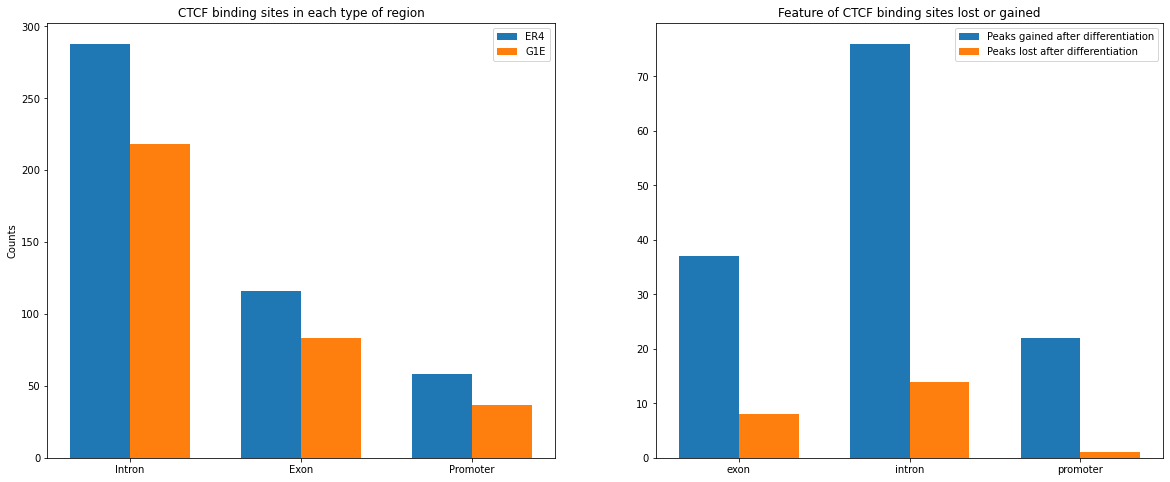

In [23]:
fig,axes = plt.subplots(1,2, figsize = (20,8))

#the number of CTCF binding sites in each type of region
ind = np.arange(3)
width = 0.35
axes[0].bar(ind-width/2, ER4_dict.values(),width,label = "ER4")
axes[0].bar(ind+width/2, G1E_dict.values(),width,label = "G1E")
axes[0].set_xticks(ind)
axes[0].set_xticklabels(('Intron', 'Exon', 'Promoter'))
axes[0].set_ylabel("Counts")
axes[0].legend()
axes[0].set_title("CTCF binding sites in each type of region")

#number of sites lost and gained during differentiation for each cell type
axes[1].bar(ind, counts_gained.tolist(), width, label='Peaks gained after differentiation')
axes[1].bar(ind + width, counts_lost.tolist(), width, label='Peaks lost after differentiation')
axes[1].set_xticks(ind + width / 2)
axes[1].set_xticklabels(['exon', 'intron', 'promoter'])
axes[1].legend(loc='upper right')
axes[1].set_title('Feature of CTCF binding sites lost or gained')

plt.show()
